https://www.youtube.com/watch?v=6LhV32OIZ1Y

https://www.youtube.com/watch?v=558k7D2alxM

In [6]:
import numpy as np
import math
from scipy.stats import norm

#define variables

r = 0.01 #interest rate
S = 30 #stock price
K = 40 #strike price
T = 240/365
sigma = 0.3 #volatility

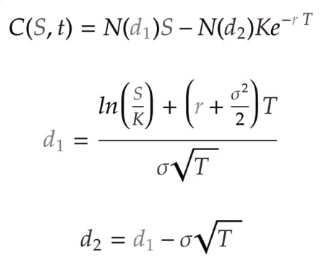

In [10]:
def blackscholes(r, S, K, T, sigma, type='C'):    
    d1 = (np.log(S/K) + (r+ sigma**2/2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if type == 'C':
        price = S*norm.cdf(d1,0,1) - K*np.exp(-r*T)*norm.cdf(d2,0,1)
    else:
        price = K*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
        
    return round(price,2)
    
blackscholes(r,S,K,T,sigma,'C')

0.51

# Delta 
measures the rate of change of the theoretical option value with respect to changes in the underlying asset’s price.

$\Delta = \frac{\partial V}{\partial S}$

$\Delta_{call} = \Phi(d1)$

$\Delta_{put} = -\Phi(-d1)$

In [ ]:
if type == "c":
    delta_calc = norm.cdf(d1, 0, 1)
elif type == "p":
    delta_calc = -norm.cdf(-d1, 0, 1)
    
delta_calc

# Gamma
measures the rate of change in the delta with respect to changes in the underlying price.

$\Gamma = \frac{\partial \Delta}{\partial S} = \frac{\partial^2 V}{\partial S^2}$

$\Gamma = \frac{\phi(d1)}{S\sigma\sqrt{\tau}}$

In [ ]:
gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
gamma_calc

# Vega

measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

$\upsilon = \frac{\partial V}{\partial \sigma}$

$\upsilon = S\phi(d1)\sqrt{\tau}$

In [ ]:
vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
vega_calc*0.01

# Theta
measures the sensitivity of the value of the derivative to the passage of time – time decay.

$\Theta = -\frac{\partial V}{\partial \tau}$

$\Theta_{call} = -\frac{S\phi(d1)\sigma}{2\tau} – rK\exp{(-rT)}\Phi(d2)$

$\Theta_{put} = -\frac{S\phi(d1)\sigma}{2\tau} + rK\exp{(-rT)}\Phi(-d2)$

In [ ]:
if type == "c":
    theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
elif type == "p":
    theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
    
theta_calc/365

# Rho
measures the sensitivity to the interest rate.

$\rho = \frac{\partial V}{\partial r}$

$\rho_{call} = K\tau\exp{(-rT)}\Phi(d2)$

$\rho_{put} = -K\tau\exp{(-rT)}\Phi(-d2)$

In [ ]:
if type == "c":
    rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
elif type == "p":
    rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
rho_calc*0.01

# Implied Volatility
with the Newton-Raphson Method

https://www.youtube.com/watch?v=mPgVeazeq5U

sigma new = sigma old - (BS(sigma old) - C(market price))/Vega(sigma old)

In [23]:
import math
from scipy.stats import norm

def black_scholes_call(S, X, r, T, sigma):
    """
    Calculate the theoretical price of a European call option using the Black-Scholes formula.
    
    Parameters:
    - S: Current underlying asset price
    - X: Strike price
    - r: Risk-free interest rate
    - T: Time to expiration
    - sigma: Volatility
    
    Returns:
    - Theoretical option price
    """
    d1 = (math.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    call_price = S * norm.cdf(d1) - X * math.exp(-r * T) * norm.cdf(d2)
    return call_price

def implied_volatility(S, X, r, T, C_observed, max_iterations=1000, tolerance=1e-7):
    """
    Find the implied volatility using Newton's method.
    
    Parameters:
    - S: Current underlying asset price
    - X: Strike price
    - r: Risk-free interest rate
    - T: Time to expiration
    - C_observed: Observed option price
    - max_iterations: Maximum number of iterations for convergence
    - tolerance: Convergence criteria (stop iterations if |C_calculated - C_observed| < tolerance)
    
    Returns:
    - Implied volatility
    """
    # Initial guess for implied volatility
    sigma = 0.5
    
    for i in range(max_iterations):
        # Calculate the option price using the current volatility guess
        C_calculated = black_scholes_call(S, X, r, T, sigma)
        
        # Calculate the derivative of the option price with respect to volatility
        vega = (black_scholes_call(S, X, r, T, sigma + 0.0001) - C_calculated) / 0.0001
        
        # Check convergence criteria
        if abs(C_calculated - C_observed) < tolerance:
            break
    
        # Update the guess for implied volatility using Newton's method
        sigma -= (C_calculated - C_observed) / vega
        
    return sigma

# Example usage
S = 100  # Current underlying asset price
X = 105  # Strike price
r = 0.05  # Risk-free interest rate
T = 240/360  # Time to expiration
C_observed = 10  # Observed option price

implied_vol = implied_volatility(S, X, r, T, C_observed)
print("Implied Volatility:", implied_vol)

Implied Volatility: 0.32879583609900565
